# Mask grids with shapefiles

In [1]:
from __future__ import annotations

%%capture
%load_ext autoreload
%autoreload 2

import os

import geopandas as gpd

from polartoolkit import fetch, maps, utils

In [2]:
# set default to northern hemisphere for this notebook
os.environ["POLARTOOLKIT_HEMISPHERE"] = "north"

In [3]:
# fetch a grid
grid = fetch.bedmachine(
    layer="surface",
)

# fetch a shapefile
shapefile = fetch.groundingline(version="BAS")
# load the shapefile
groundingline = gpd.read_file(shapefile)

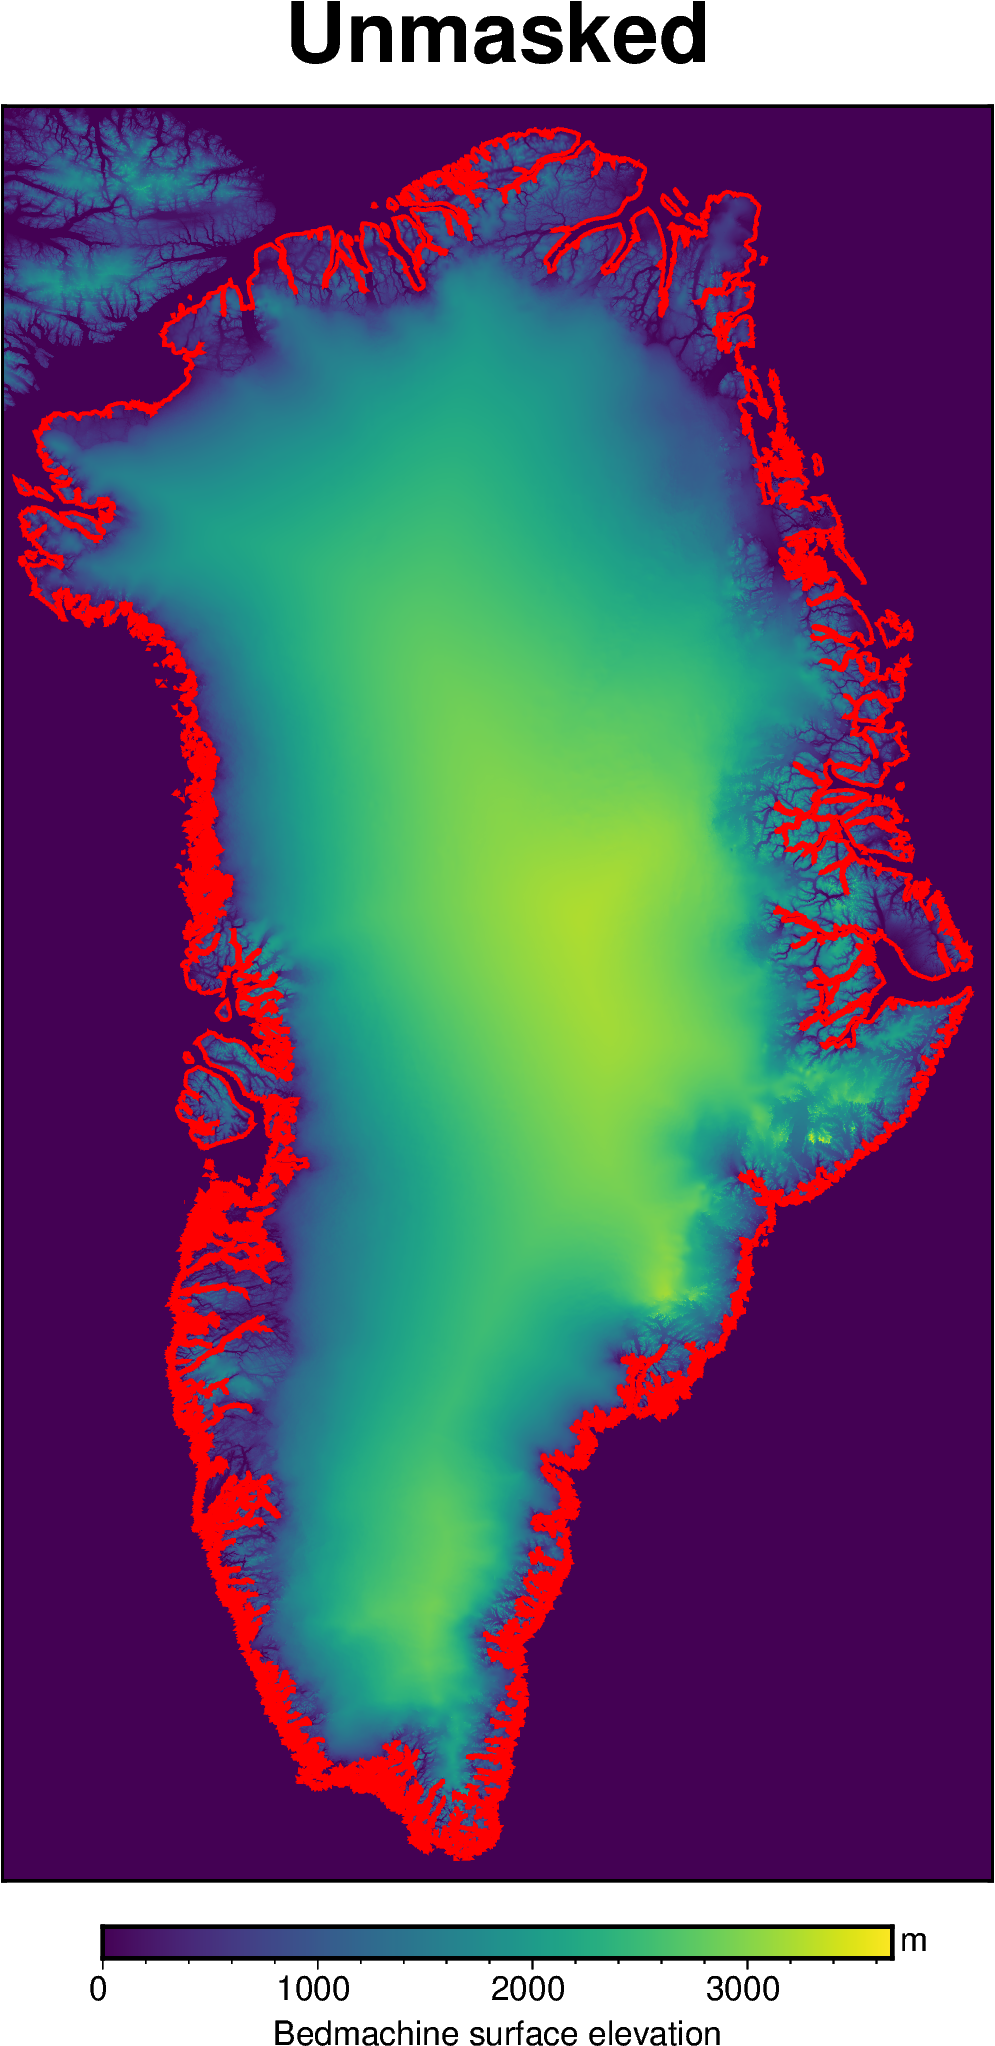

In [4]:
# plot the grid
fig = maps.plot_grd(
    grid,
    title="Unmasked",
    cbar_label="Bedmachine surface elevation",
    cbar_unit="m",
)

# plot the shapefile
fig.plot(groundingline, pen=".8p,red")

# show the plot
fig.show()

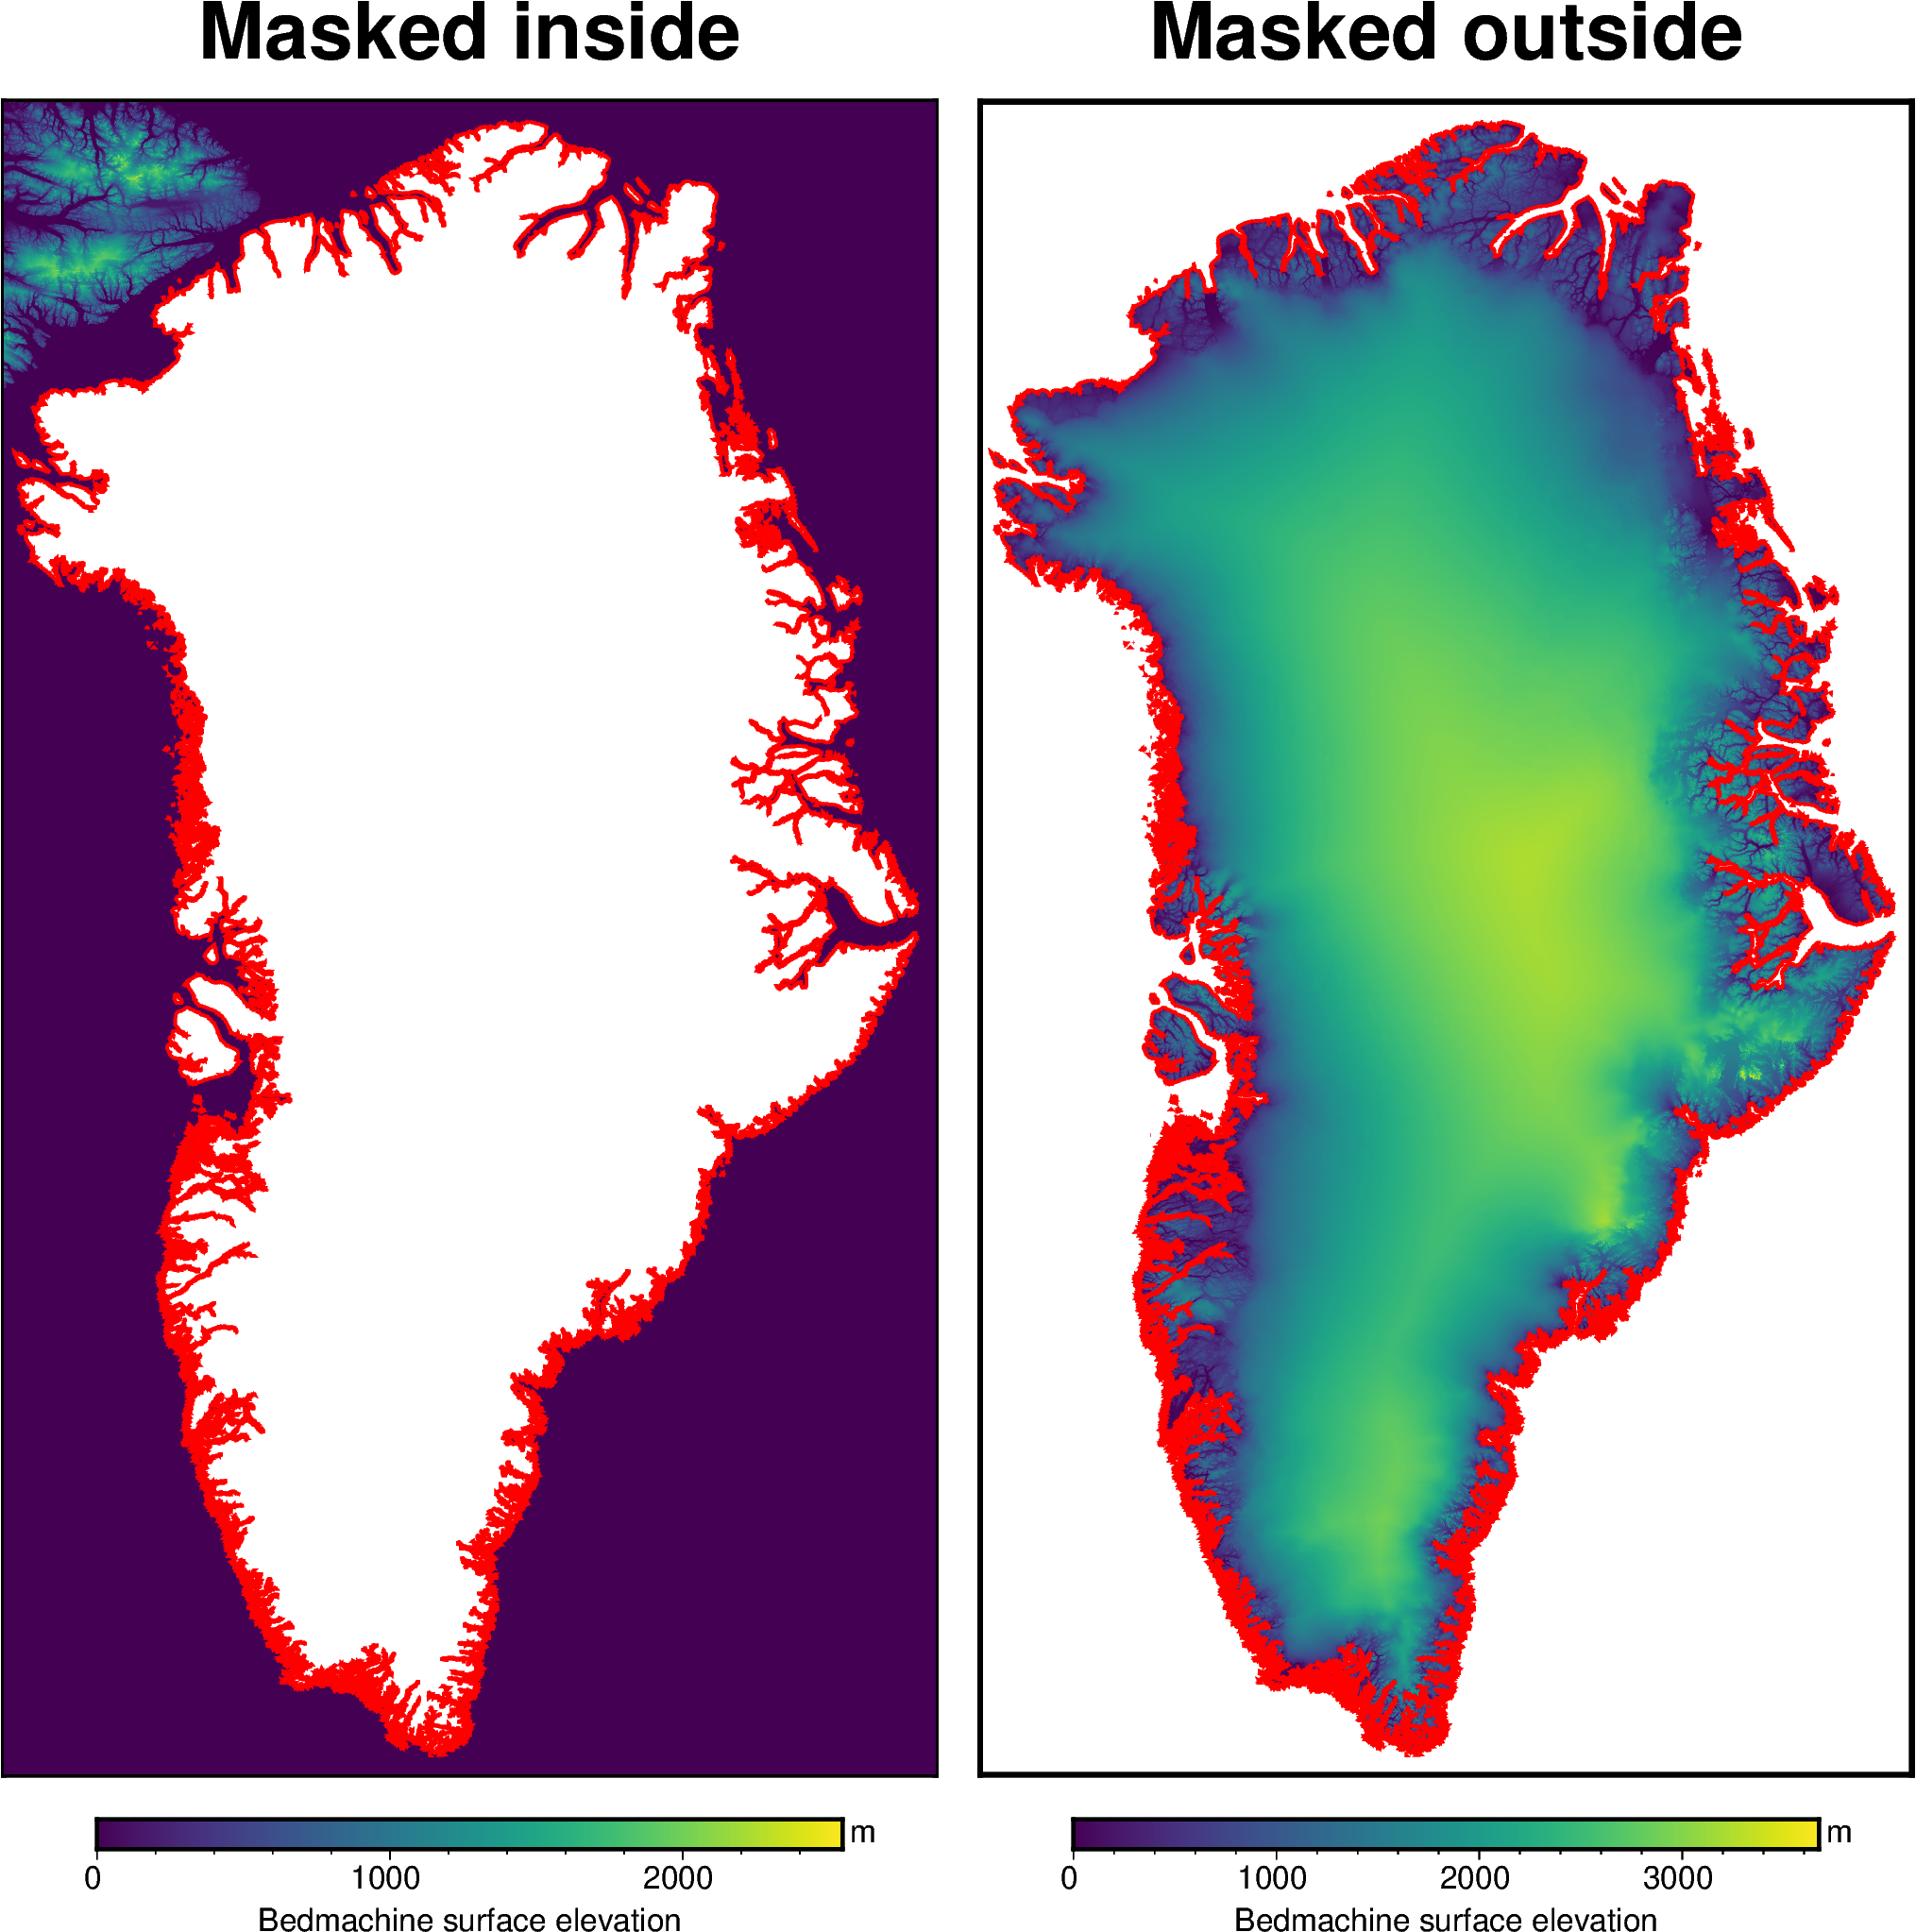

In [5]:
# mask the inside region
masked_inside = utils.mask_from_shp(
    shapefile=groundingline,
    grid=grid,
    masked=True,
)

# mask the outside region
masked_outside = utils.mask_from_shp(
    shapefile=groundingline,
    grid=grid,
    masked=True,
    invert=False,
)

# plot the inside-masked grid
fig = maps.plot_grd(
    masked_inside,
    title="Masked inside",
    cbar_label="Bedmachine surface elevation",
    cbar_unit="m",
    # region=regions.greenland,
)
# plot the shapefile
fig.plot(groundingline, pen=".8p,red")

# plot the outside-masked grid
fig = maps.plot_grd(
    masked_outside,
    title="Masked outside",
    cbar_label="Bedmachine surface elevation",
    cbar_unit="m",
    fig=fig,
    origin_shift="x",
)
# plot the shapefile
fig.plot(groundingline, pen=".8p,red")


# show the plot
fig.show()

## Make custom shapefile in QGIS

QGIS, especially with the [Quantarctica](https://www.npolar.no/quantarctica/#toggle-id-2) and [QGreenland](https://qgreenland.org/) packages, is an easy way to interactively make a custom shapefile. This can then be used with `polartoolkit` to sample data along the file.

To make the shapefile in QGIS:
*  Layer -> Create Layer -> New Shapefile Layer
* For `Geometry Type`, select `Polygon`
* Select `EPSG:3031` for the coordinate reference system
* Save to the same directory as your python file you want to work with.